In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv(r'C:\Users\kevin\OneDrive\Documents\Hotel_Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
def get_unique_values(df):
    for col in df.columns:
        print(col, ': ', df[col].unique())
        print('# unique values: ', df[col].nunique(), '\n')
get_unique_values(df)

Booking_ID :  ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
# unique values:  36275 

no_of_adults :  [2 1 3 0 4]
# unique values:  5 

no_of_children :  [ 0  2  1  3 10  9]
# unique values:  6 

no_of_weekend_nights :  [1 2 0 4 3 6 5 7]
# unique values:  8 

no_of_week_nights :  [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
# unique values:  18 

type_of_meal_plan :  ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
# unique values:  4 

required_car_parking_space :  [0 1]
# unique values:  2 

room_type_reserved :  ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
# unique values:  7 

lead_time :  [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320

In [9]:
df.sort_values(['arrival_year', 'arrival_month', 'arrival_date'])[['arrival_year', 'arrival_month', 'arrival_date']]

,arrival_year,arrival_month,arrival_date
583,2017,7,1
695,2017,7,1
769,2017,7,1
1132,2017,7,1
1775,2017,7,1
...,...,...,...
32027,2018,12,31
32894,2018,12,31
33442,2018,12,31
33902,2018,12,31


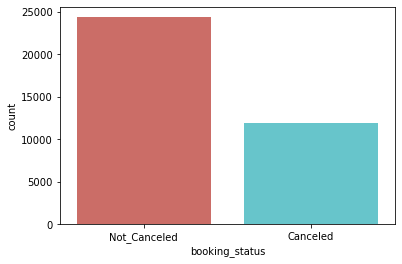

In [10]:
sns.countplot(x='booking_status', data = df, palette = 'hls')
plt.show()

In [11]:
count_no_sub = len(df[df['booking_status']=='Not_Canceled'])
count_sub = len(df[df['booking_status']=='Canceled'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 67.23638869745004
percentage of subscription 32.76361130254997


In [12]:
df.groupby('booking_status').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,
Canceled,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,2017.919142,7.374253,15.730080,0.001346,0.005553,0.002188,110.589966,0.334623
Not_Canceled,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,2017.772325,7.447724,15.532144,0.037474,0.032021,0.227101,99.931412,0.758549


In [13]:
df.groupby('room_type_reserved').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
room_type_reserved,,,,,,,,,,,,,,
Room_Type 1,1.770316,0.049378,0.779844,2.125133,0.027693,89.642943,2017.798969,7.445965,15.434447,0.028724,0.026129,0.169428,95.918532,0.557803
Room_Type 2,1.579480,0.588150,0.929191,2.316474,0.049133,101.021676,2017.787572,6.998555,16.507225,0.010116,0.000000,0.034682,87.848555,0.761561
Room_Type 3,1.571429,0.000000,0.571429,2.000000,0.000000,69.571429,2017.571429,10.142857,15.142857,0.000000,0.000000,0.000000,73.678571,0.142857
Room_Type 4,2.192505,0.038138,0.933465,2.541027,0.037642,69.205712,2017.910187,7.335645,16.077266,0.011062,0.011227,0.059766,125.287317,0.842331
Room_Type 5,1.739623,0.132075,0.758491,2.196226,0.022642,59.547170,2017.924528,7.498113,15.611321,0.064151,0.018868,0.550943,123.733623,0.335849
Room_Type 6,1.994824,1.688406,0.883023,2.330228,0.068323,61.015528,2017.863354,7.546584,16.583851,0.010352,0.006211,0.078675,182.212836,0.904762
Room_Type 7,2.246835,0.797468,0.740506,2.151899,0.069620,37.094937,2017.917722,7.689873,16.101266,0.132911,0.208861,1.208861,155.198291,1.227848


<AxesSubplot:xlabel='no_of_adults'>

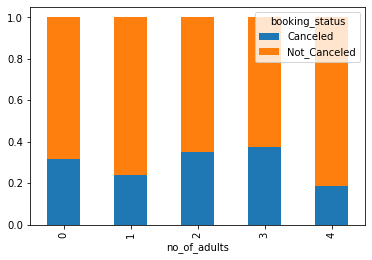

In [14]:
table = pd.crosstab(df['no_of_adults'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='no_of_children'>

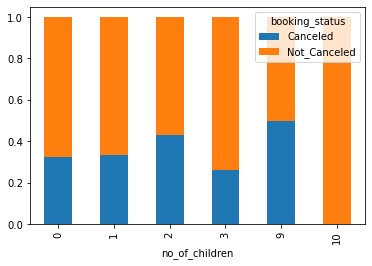

In [15]:
table = pd.crosstab(df['no_of_children'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='no_of_weekend_nights'>

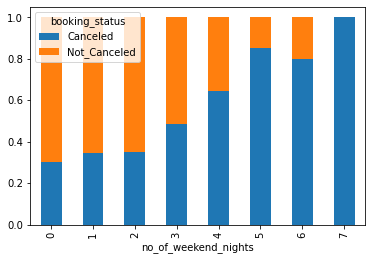

In [16]:
table = pd.crosstab(df['no_of_weekend_nights'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='required_car_parking_space'>

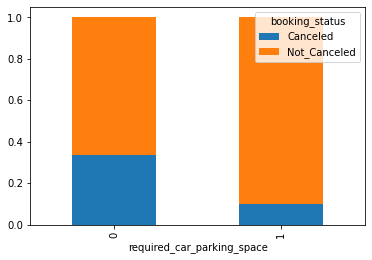

In [17]:
table = pd.crosstab(df['required_car_parking_space'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='arrival_year'>

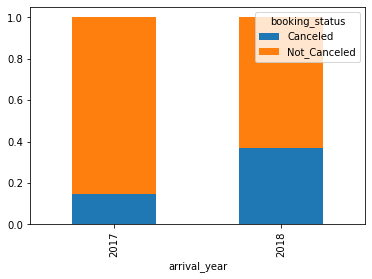

In [18]:
table = pd.crosstab(df['arrival_year'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='room_type_reserved'>

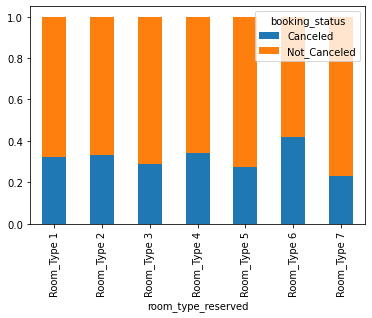

In [19]:
table = pd.crosstab(df['room_type_reserved'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='no_of_week_nights'>

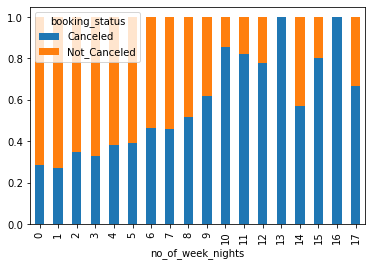

In [20]:
table = pd.crosstab(df['no_of_week_nights'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='market_segment_type'>

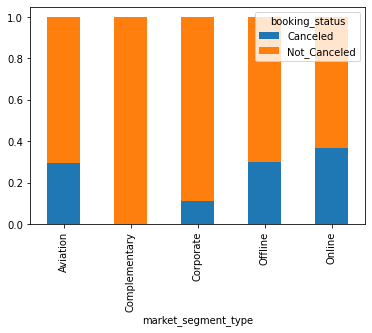

In [21]:
table = pd.crosstab(df['market_segment_type'], df['booking_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='arrival_month'>

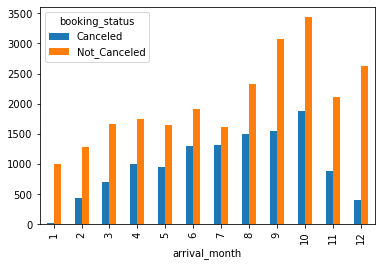

In [22]:
table = pd.crosstab(df['arrival_month'], df['booking_status'])
table.plot(kind='bar')

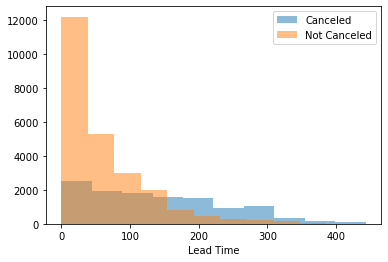

In [23]:
canceled = df[df['booking_status']=='Canceled']['lead_time']
not_canceled = df[df['booking_status']=='Not_Canceled']['lead_time']
plt.hist(canceled, alpha=0.5, label='Canceled')
plt.hist(not_canceled, alpha=0.5, label='Not Canceled')
plt.legend()
plt.xlabel('Lead Time')
plt.show()

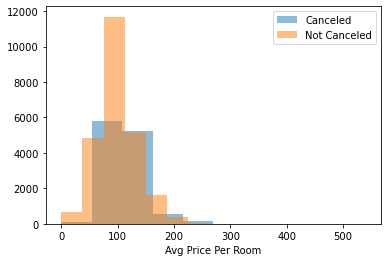

In [24]:
canceled = df[df['booking_status']=='Canceled']['avg_price_per_room']
not_canceled = df[df['booking_status']=='Not_Canceled']['avg_price_per_room']
plt.hist(canceled, alpha=0.5, label='Canceled')
plt.hist(not_canceled, alpha=0.5, label='Not Canceled')
plt.legend()
plt.xlabel('Avg Price Per Room')
plt.show()

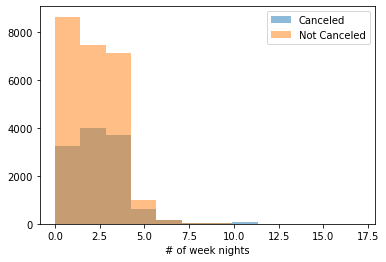

In [25]:
canceled = df[df['booking_status']=='Canceled']['no_of_week_nights']
not_canceled = df[df['booking_status']=='Not_Canceled']['no_of_week_nights']
plt.hist(canceled, alpha=0.5, label='Canceled', bins = 12)
plt.hist(not_canceled, alpha=0.5, label='Not Canceled' ,bins = 12)
plt.legend()
plt.xlabel('# of week nights')
plt.show()       

In [26]:
table = pd.crosstab(df['no_of_previous_cancellations'], df['booking_status'])
table

booking_status,Canceled,Not_Canceled
no_of_previous_cancellations,,
0,11869,24068
1,11,187
2,0,46
3,1,42
4,0,10
5,0,11
6,0,1
11,0,25
13,4,0


In [27]:
df.groupby('booking_status').count()[['repeated_guest']]

,repeated_guest
booking_status,
Canceled,11885
Not_Canceled,24390


In [28]:
df.groupby('booking_status').sum()[['repeated_guest']]

,repeated_guest
booking_status,
Canceled,16
Not_Canceled,914


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

In [30]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = df[['type_of_meal_plan', 'market_segment_type', 'room_type_reserved']]
Y= enc.fit_transform(X)
enc.get_feature_names_out()

array(['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'market_segment_type_Aviation',
       'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7'],
      dtype=object)

In [31]:
df1 = pd.DataFrame.sparse.from_spmatrix(Y)
df1.columns = enc.get_feature_names_out()
df1

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36271,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36272,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
logreg = LogisticRegression(max_iter = 100)
X = df.drop(['booking_status', "Booking_ID"], axis = 1)
y = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
X.shape

(36275, 17)

In [33]:
df[df1.columns] = df1[df1.columns]
df = df.drop(['type_of_meal_plan', 'market_segment_type', 'room_type_reserved'], axis = 1)

In [34]:
logreg = LogisticRegression(max_iter = 100)
X = df.drop(['booking_status', "Booking_ID"], axis = 1)
y = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
X.shape

(36275, 30)

In [35]:
scaler = preprocessing.StandardScaler().fit(X)
X_standard_scaled = scaler.transform(X)
rfe = RFE(logreg, n_features_to_select = 12, step = 1, verbose = 1)
rfe = rfe.fit(X_standard_scaled, y.values.ravel())

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


In [36]:
rfe.support_
X_rfe= X.loc[:, rfe.support_]
X_rfe.columns

Index(['no_of_weekend_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'repeated_guest',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'market_segment_type_Complementary',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'room_type_reserved_Room_Type 1'],
      dtype='object')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.33, random_state=42)
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      8010
           1       0.75      0.60      0.67      3961

    accuracy                           0.80     11971
   macro avg       0.79      0.75      0.76     11971
weighted avg       0.80      0.80      0.80     11971



C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


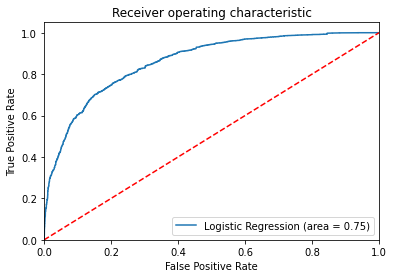

In [39]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()